# Data Pre-processing 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel(r"C:\Users\Anurag\Desktop\Machine learning Project\src\Notebook\data\marketing_campaign.xlsx")

In [2]:
df.shape

(2240, 29)

# Data Cleaning

# handling missing data

- Handling missing values 
- Handlong Duplicates
- Check data Dtypes
- Understand the data set

Checking the null values


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- income has some missing values

In [4]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

- Imputing Null Values

In [5]:
df["Income"].fillna(df.Income.median(),inplace=True)

# Checking The Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
columns=["Z_CostContact","Z_Revenue"]
for column in columns:
    df.drop(column,inplace=True,axis=1)

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# Feature Engineering

In [10]:
from datetime import datetime


df = df.copy()

##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

- Types of feature

In [11]:
num_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
print ('num of numeriacal feature' ,len(num_feature))

num of numeriacal feature 21


In [12]:
cat_feature=[feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_feature))

Num of Categorical Features : 0


In [13]:
discrete_feature = [feature for feature in num_feature if len(df[feature].unique())<=25]
print("num of dicrete eature are", len(discrete_feature))

num of dicrete eature are 10


In [14]:
continuous_features=[feature for feature in num_feature if feature not in discrete_feature]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 11


# checking for outlier and capping it 
- using iqr for handling outliers

In [15]:
continuous_features

['Age',
 'Income',
 'Total_Spending',
 'Days_as_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold']

In [16]:
discrete_feature

['Education',
 'Marital Status',
 'Parental Status',
 'Children',
 'Web',
 'Catalog',
 'Store',
 'Discount Purchases',
 'Total Promo',
 'NumWebVisitsMonth']

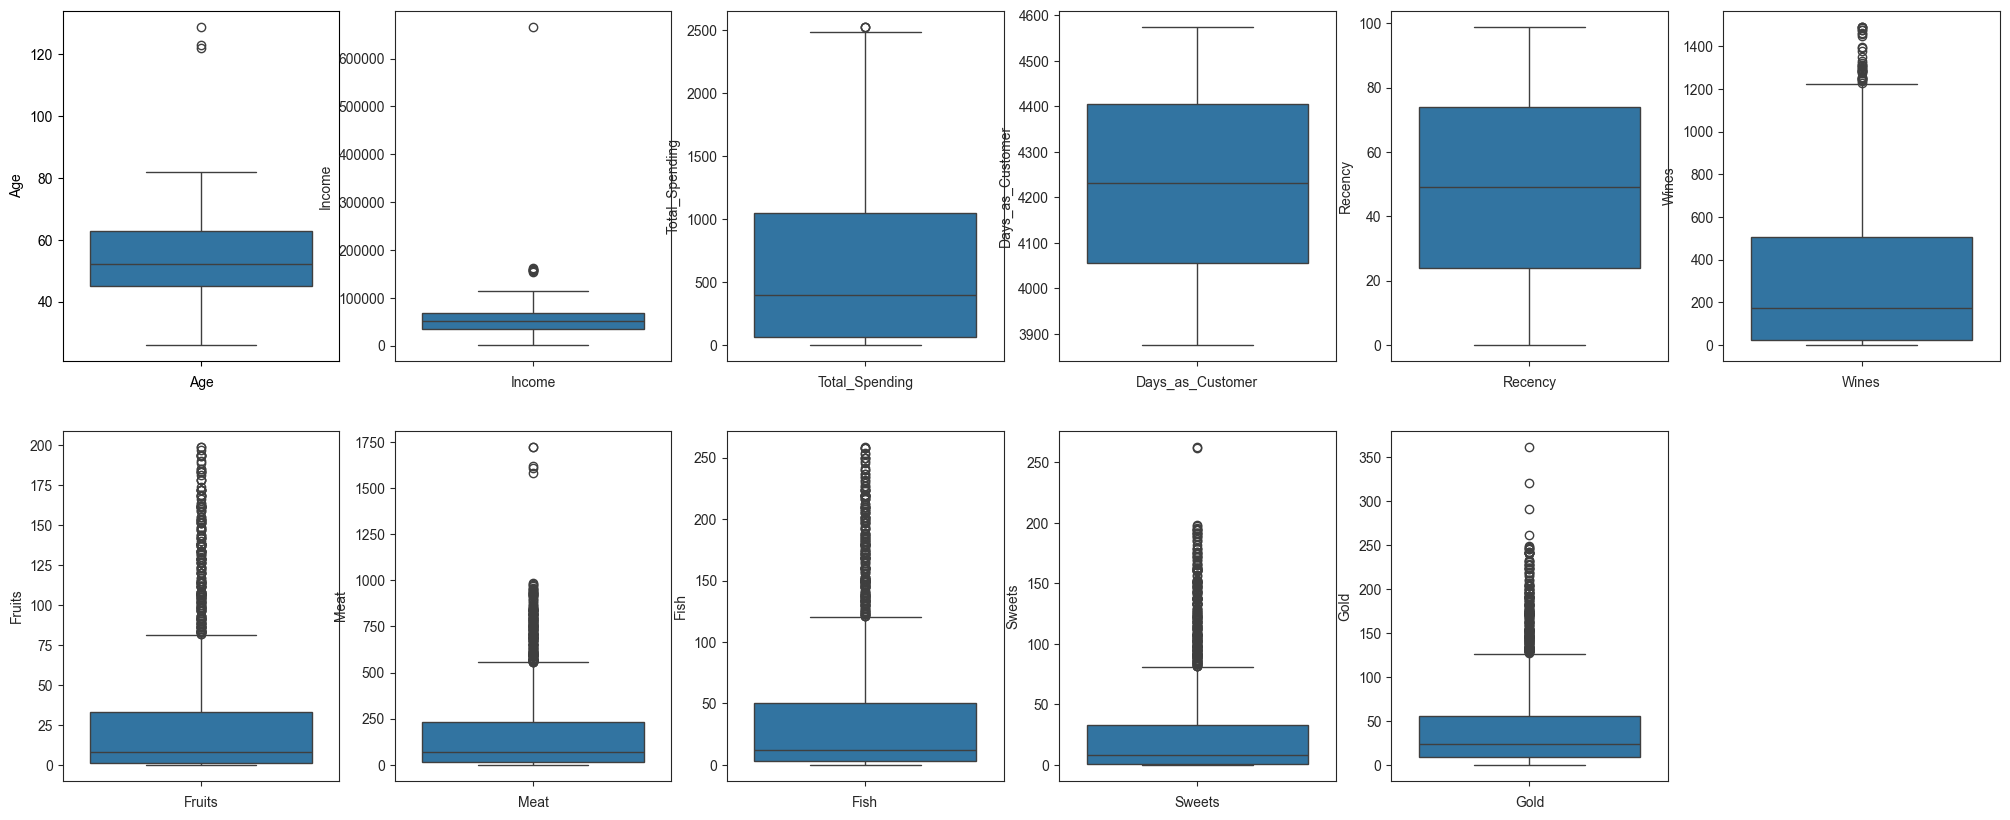

In [17]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(2,6,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

In [18]:
pd.pandas.set_option("display.max_columns", 100)

recency and days_as_customer does not have any outliers

Detecting ouliers and capping it 

In [19]:
def detect_outlier(col):
    percentile25=df[col].quantile(0.25)
    percentile75=df[col].quantile(0.75)
    print("\n ##########",col,"##########")
    print("percentile25",percentile25)
    print("percentile75",percentile75)

    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr

    print("upper limit",upper_limit)
    print("lower limit",lower_limit)

    df.loc[(df[col]>upper_limit),col]=upper_limit
    df.loc[(df[col]>lower_limit),col]=lower_limit
    return df


In [20]:
for col in continuous_features:
    detect_outlier(col)


 ########## Age ##########
percentile25 45.0
percentile75 63.0
upper limit 90.0
lower limit 18.0

 ########## Income ##########
percentile25 35538.75
percentile75 68289.75
upper limit 117416.25
lower limit -13587.75

 ########## Total_Spending ##########
percentile25 68.75
percentile75 1045.5
upper limit 2510.625
lower limit -1396.375

 ########## Days_as_Customer ##########
percentile25 4056.75
percentile75 4405.0
upper limit 4927.375
lower limit 3534.375

 ########## Recency ##########
percentile25 24.0
percentile75 74.0
upper limit 149.0
lower limit -51.0

 ########## Wines ##########
percentile25 23.75
percentile75 504.25
upper limit 1225.0
lower limit -697.0

 ########## Fruits ##########
percentile25 1.0
percentile75 33.0
upper limit 81.0
lower limit -47.0

 ########## Meat ##########
percentile25 16.0
percentile75 232.0
upper limit 556.0
lower limit -308.0

 ########## Fish ##########
percentile25 3.0
percentile75 50.0
upper limit 120.5
lower limit -67.5

 ########## Sweets ###

**cheking skewness after outline capping**

In [21]:
df[continuous_features].skew(axis=0,skipna=True)

Age                 0.0
Income              0.0
Total_Spending      0.0
Days_as_Customer    0.0
Recency             0.0
Wines               0.0
Fruits              0.0
Meat                0.0
Fish                0.0
Sweets              0.0
Gold                0.0
dtype: float64

columns which have outlier


# Feature Transformation

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [23]:
numeric_features

['Education',
 'Marital Status',
 'Parental Status',
 'Children',
 'Income',
 'Days_as_Customer',
 'Recency',
 'Web',
 'Catalog',
 'Store',
 'Discount Purchases',
 'Total Promo',
 'NumWebVisitsMonth']

In [24]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 



datacopy= df.copy()

numeric_pipeline = Pipeline(steps=[("Imputer", SimpleImputer(strategy='constant', fill_value= 0))])

outlier_features_pipeline = Pipeline(steps=[
    ("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
    ("transformer", PowerTransformer(standardize=True))
])


preprocessor= ColumnTransformer([
    ("numeric pipeline", numeric_pipeline,numeric_features),
    ("outlier features pipeline", outlier_features_pipeline,outlier_features)   
])


columns = datacopy.columns
datacopy=preprocessor.fit_transform(datacopy)
scaled_data=pd.DataFrame(datacopy,columns=columns)




In [25]:
scaled_data.head()

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,2.0,0.0,0.0,0.0,-13587.75,3534.375,-51.0,8.0,10.0,4.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,1.0,2.0,-13587.75,3534.375,-51.0,1.0,1.0,2.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,0.0,-13587.75,3534.375,-51.0,8.0,2.0,10.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,1.0,-13587.75,3534.375,-51.0,2.0,0.0,4.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,1.0,1.0,-13587.75,3534.375,-51.0,5.0,3.0,6.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building 

PCA analysis 

In [26]:
from sklearn.decomposition import PCA
df_scaled = scaled_data.copy()
var_ratio ={}
for i in range (2,18):
    pca=PCA(n_components=i)
    df_pca=pca.fit(df_scaled)
    var_ratio[i]=sum(df_pca.explained_variance_ratio_)
    

In [27]:
var_ratio

{2: np.float64(0.699834933127059),
 3: np.float64(0.8106506038635357),
 4: np.float64(0.8949401184372531),
 5: np.float64(0.9473998524338788),
 6: np.float64(0.9730767617606834),
 7: np.float64(0.9833697118267851),
 8: np.float64(0.9927505636465084),
 9: np.float64(0.998607435732886),
 10: np.float64(1.0000000000000002),
 11: np.float64(1.0000000000000002),
 12: np.float64(1.0000000000000002),
 13: np.float64(1.0000000000000002),
 14: np.float64(1.0000000000000002),
 15: np.float64(1.0000000000000002),
 16: np.float64(1.0000000000000002),
 17: np.float64(1.0000000000000002)}

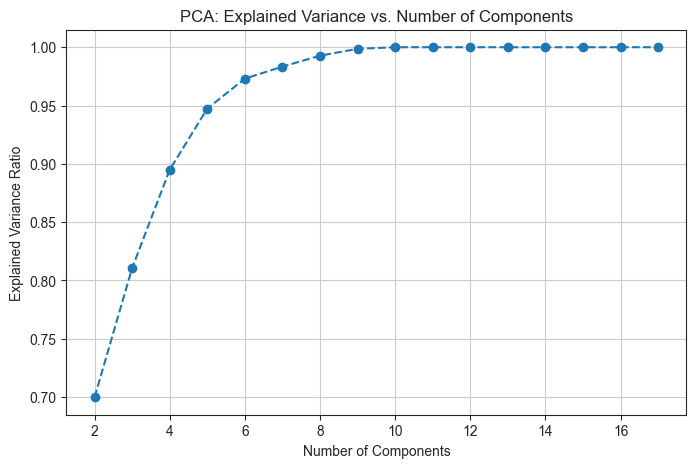

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(var_ratio.keys()), list(var_ratio.values()), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

**From graph 6 components are optimal**

In [51]:
pca_final = PCA(n_components=2,random_state=42)
reduced=pca_final.fit_transform(df_scaled)
pcadf= pd.DataFrame(reduced,columns=["PC1","PC2"])

pcadf.head()

,PC1,PC2
0,3.919858,1.471635
1,-4.648167,-2.130697
2,4.488865,1.560984
3,-3.724063,-0.549248
4,0.838343,1.576585


## Optimal cluster number - elbow method

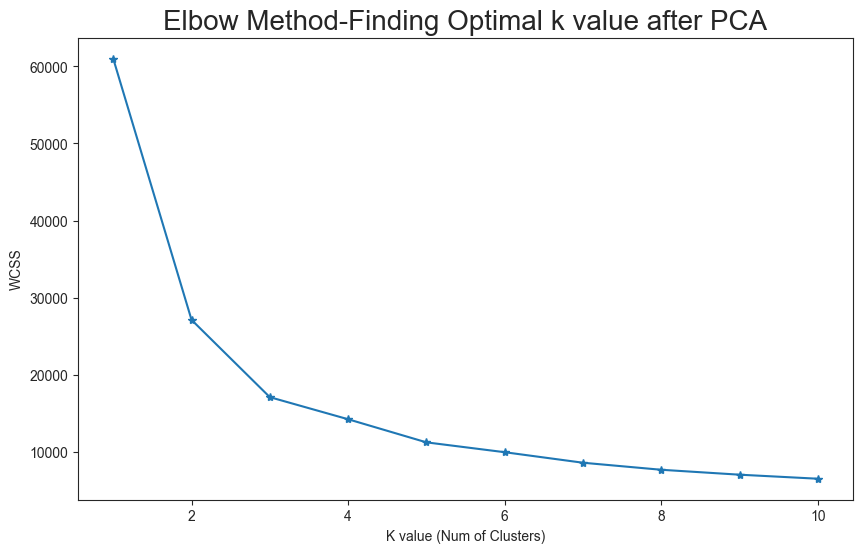

In [52]:
from sklearn.cluster import KMeans
wcss={}
plt.figure(figsize=(10,6))
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i]=km.inertia_


plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

from the graph 3 cluster are optimal 

In [59]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2,random_state=42)
model_labels=kmeans.fit_predict(pcadf)
model_center=kmeans.cluster_centers_


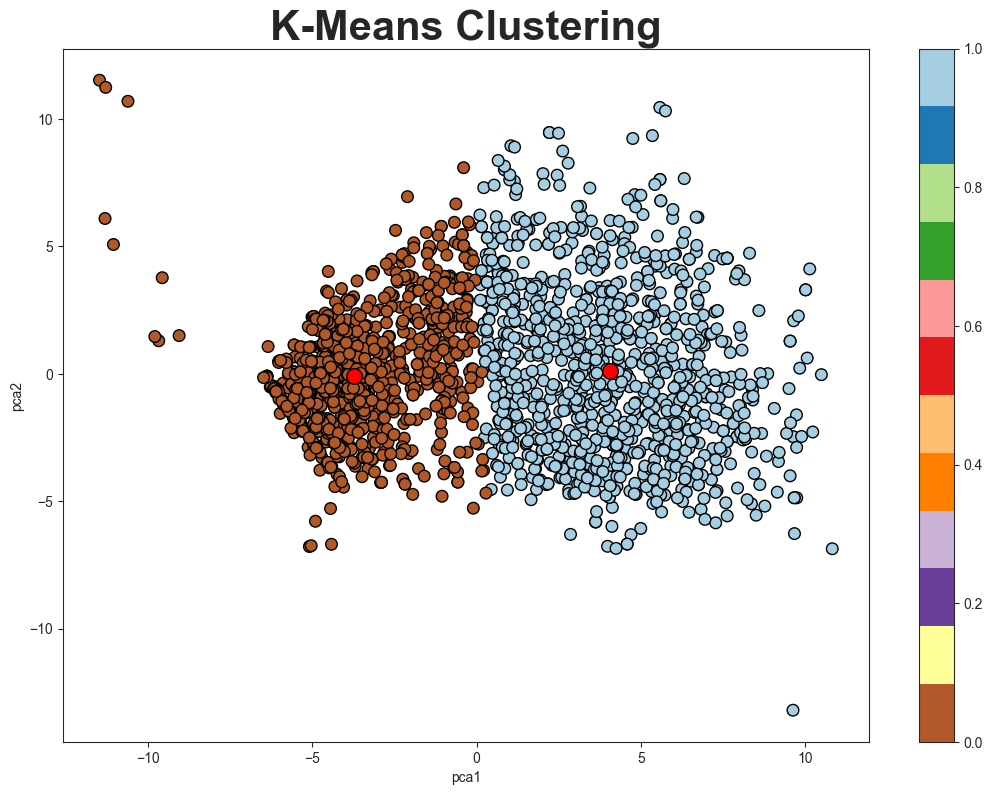

In [60]:
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_labels, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_center[:,0], model_center[:,1], c='red', marker='.',s=500, ec='k');

In [61]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pcadf.iloc[:, :-1], model_labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.67


# hierarchial clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score




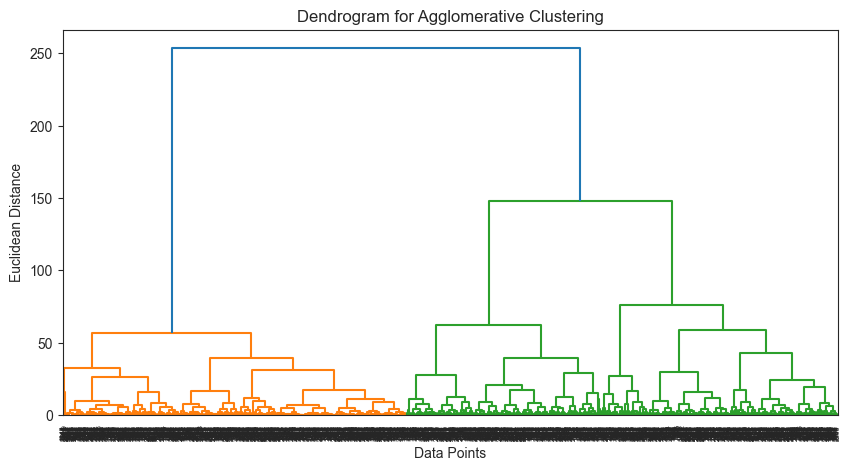

In [58]:
linkage_matrix = linkage(pcadf, method='ward')  # 'ward' minimizes variance
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(pcadf)

# Add cluster labels to your PCA dataframe
pcadf['Cluster'] = labels

In [64]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(pcadf, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.48


since having 2 cluster in k means having best silhoutte score so k means will be best 

saving the model 


In [69]:
import os
df['cluster']=model_labels.astype(int)
os.makedirs('data',exist_ok=True)
df.to_csv("./data/clustered_data.csv", index=False)